In [1]:
from PIL import Image, ImageChops
import cv2
import numpy as np
import matplotlib.pyplot as plt

# a

In [2]:
img1 = Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 1/tintin_companions_1.jpg')
img2 = Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 1/tintin_companions_2.jpg')

In [3]:
diff = ImageChops.difference(img1,img2)

In [80]:
from scipy import sum, average

def compare_images(img1, img2):

    diff = abs(img1 - img2)  
    return diff

def to_grayscale(arr):
    if len(arr.shape) == 3:
        return average(arr, -1)  
    else:
        return arr

In [81]:
img1 = to_grayscale(cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 1/tintin_companions_1.jpg').astype(float))
img2 = to_grayscale(cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 1/tintin_companions_2.jpg').astype(float))

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.average is deprecated and will be removed in SciPy 2.0.0, use numpy.average instead
  # Remove the CWD from sys.path while we load stuff.


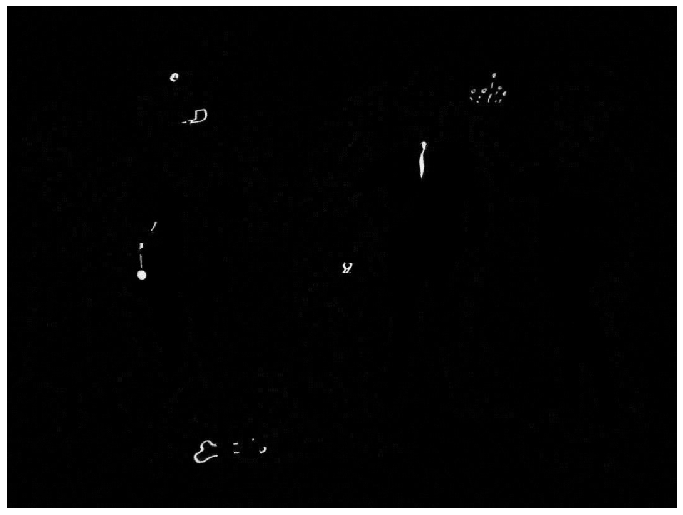

In [82]:
dif_img = compare_images(img1,img2)
plt.figure(figsize = (12,12))
plt.imshow(dif_img,'gray')

plt.axis('off')
plt.show()

# b

In [11]:
import cv2
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

In [12]:
MIN_MATCH_COUNT = 4

imgname1 = "C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 2/the_red_sea_sharks_1.jpg"
imgname2 = "C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 2/the_red_sea_sharks_2.jpg"


img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [13]:

sift = cv2.xfeatures2d.SIFT_create()


matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})


kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

In [14]:

matches = matcher.knnMatch(descs1, descs2, 2)

matches = sorted(matches, key = lambda x:x[0].distance)


good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()

In [15]:


if len(good)>MIN_MATCH_COUNT:

    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))

In [16]:

matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)


h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))


cv2.imwrite("matched.png", matched)
cv2.imwrite("found.png", found)

True

In [17]:

b,g,r=cv2.split(found)
img_found=cv2.merge([r,g,b])

b,g,r=cv2.split(img1)
img1_rgb=cv2.merge([r,g,b])

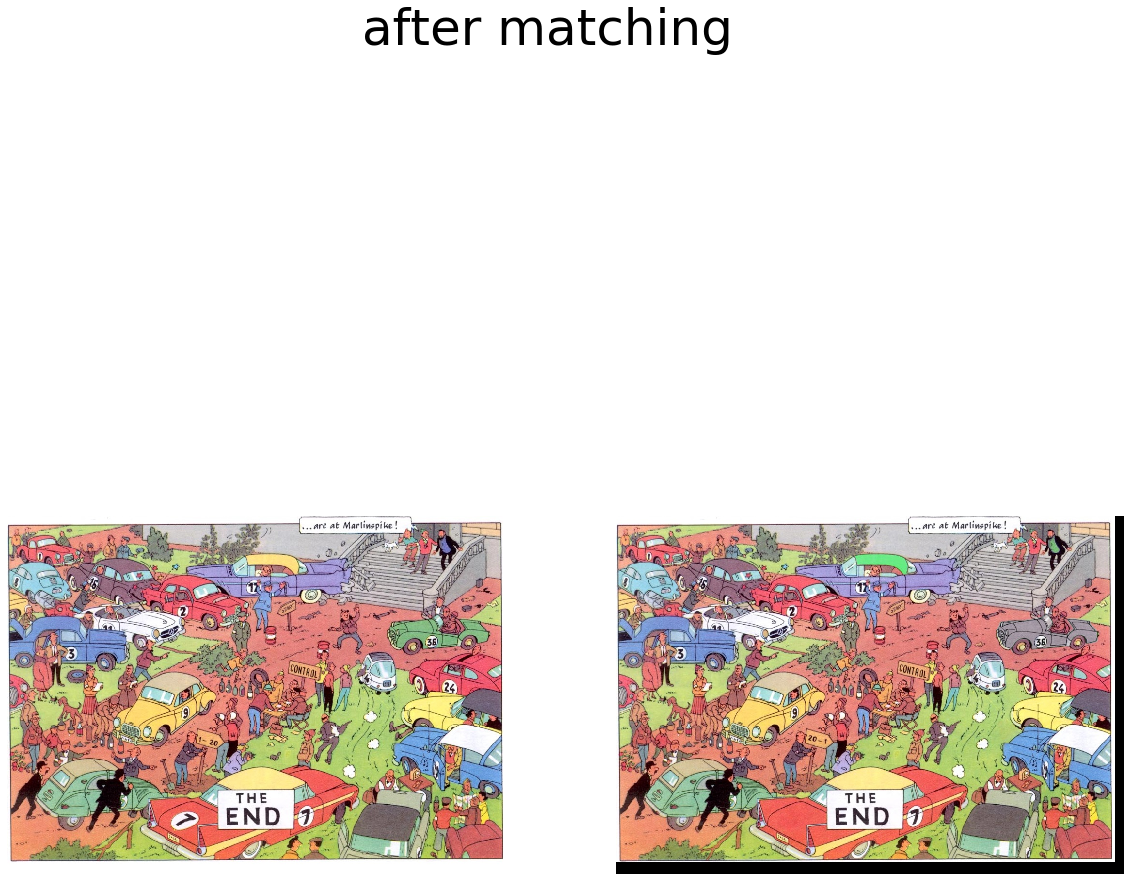

In [18]:
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(img1_rgb)
plt.axis('off')
plt.subplot(122)
plt.imshow(img_found)
plt.axis('off')
plt.suptitle('after matching',size = 50)
plt.show()

In [29]:
test = img1_rgb-img_found

In [19]:
img1_1 = Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 2/the_red_sea_sharks_1.jpg')
img2_1 = Image.open('found.png')

In [20]:
diff = ImageChops.difference(img1_1,img2_1)

In [21]:
if diff.getbbox():
    diff.save("diffrent_image_puzzle2.png")

In [22]:
width, height = diff.size 

In [23]:
im1 = diff.crop((0, 0, width-20, height-25)) 

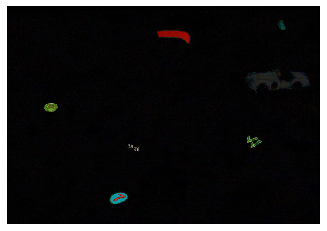

In [24]:
plt.imshow(im1)
plt.axis('off')
plt.show()

# c

In [31]:
import cv2
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

In [32]:
MIN_MATCH_COUNT = 4

imgname1 = "C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 3/tintin_in_tibet_1.jpg"
imgname2 = "C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 3/tintin_in_tibet_2.jpg"


img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [33]:

sift = cv2.xfeatures2d.SIFT_create()


matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})


kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

In [34]:

matches = matcher.knnMatch(descs1, descs2, 2)

matches = sorted(matches, key = lambda x:x[0].distance)


good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()

In [35]:


if len(good)>MIN_MATCH_COUNT:

    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))

In [36]:

matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)


h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))


cv2.imwrite("matched.png", matched)
cv2.imwrite("found.png", found)

True

In [37]:

b,g,r=cv2.split(found)
img_found=cv2.merge([r,g,b])

b,g,r=cv2.split(img1)
img1_rgb=cv2.merge([r,g,b])

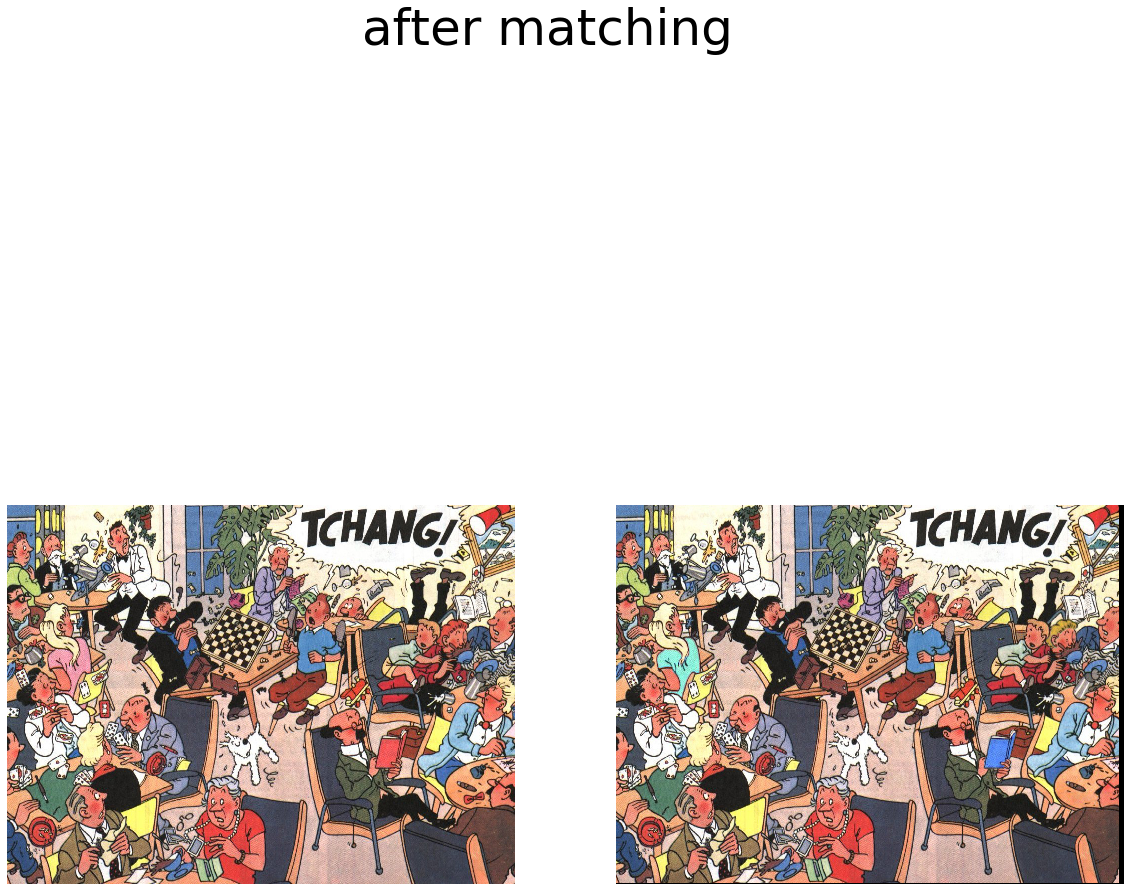

In [38]:
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(img1_rgb)
plt.axis('off')
plt.subplot(122)
plt.imshow(img_found)
plt.axis('off')
plt.suptitle('after matching',size = 50)
plt.show()

In [67]:
img1_1 = Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 3/tintin_in_tibet_1.jpg')
img2_1 = Image.open('found.png')
diff = ImageChops.difference(img1_1,img2_1)
if diff.getbbox():
    diff.save("diffrent_image_puzzle3.png")
width, height = diff.size 
im1 = diff.crop((0, 0, width-20, height-25)) 

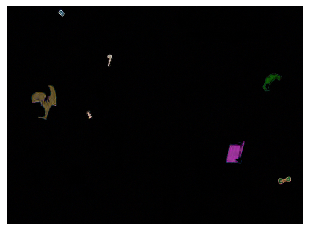

In [38]:
plt.imshow(im1)
plt.axis('off')
plt.show()

# d

In [99]:
MIN_MATCH_COUNT = 4

imgname1 = "C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 4/the_calculus_affair_1.jpg"
imgname2 = "C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 4/the_calculus_affair_2.jpg"


img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [100]:

sift = cv2.xfeatures2d.SIFT_create()


matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})


kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

In [101]:

matches = matcher.knnMatch(descs1, descs2, 2)

matches = sorted(matches, key = lambda x:x[0].distance)


good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()

In [102]:


if len(good)>MIN_MATCH_COUNT:

    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))

In [103]:

matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)


h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))

cv2.imwrite("matched.png", matched)
cv2.imwrite("found.png", found)

True

In [104]:

b,g,r=cv2.split(found)
img_found=cv2.merge([r,g,b])

b,g,r=cv2.split(img1)
img1_rgb=cv2.merge([r,g,b])

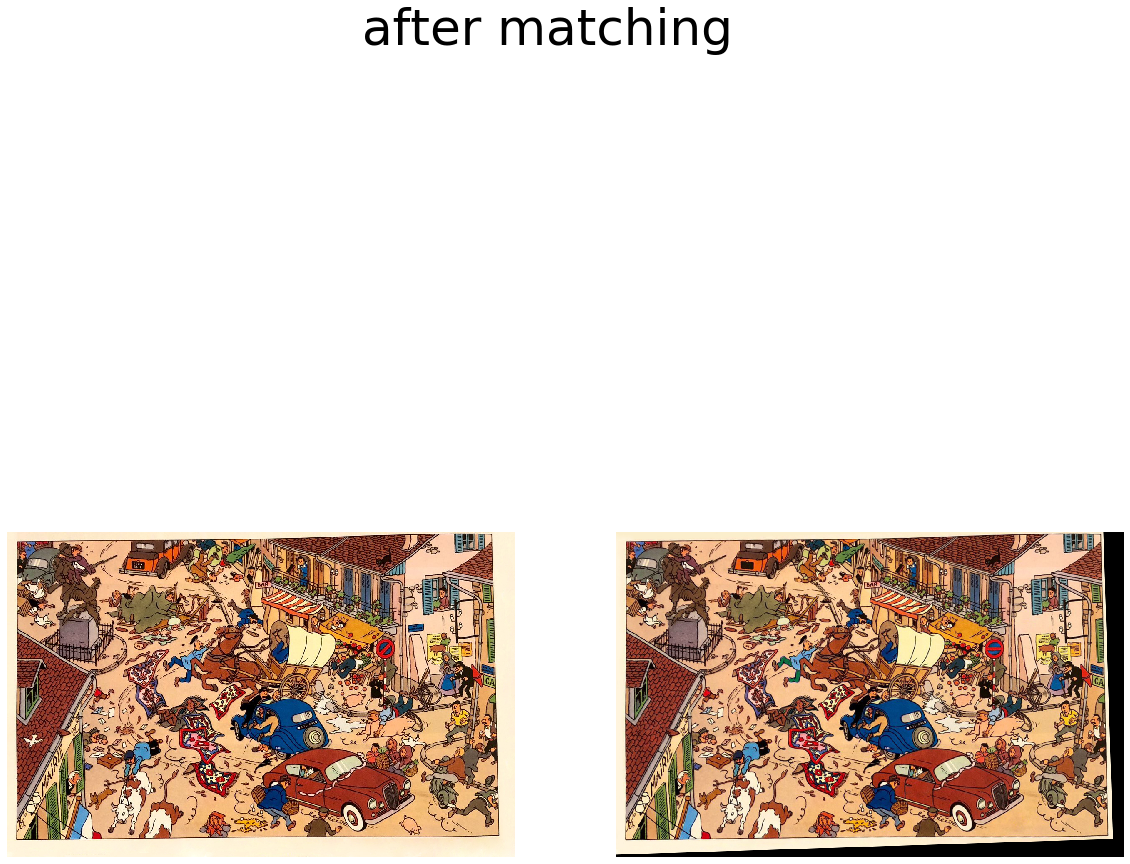

In [105]:
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(img1_rgb)
plt.axis('off')
plt.subplot(122)
plt.imshow(img_found)
plt.axis('off')
plt.suptitle('after matching',size = 50)
plt.show()

In [106]:
img1_1 = Image.open('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P6/Puzzle 4/the_calculus_affair_1.jpg')
img2_1 = Image.open('found.png')
diff = ImageChops.difference(img1_1,img2_1)
if diff.getbbox():
    diff.save("diffrent_image_puzzle3.png")

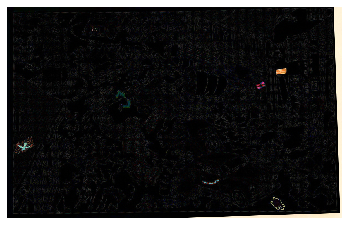

In [48]:
width, height = diff.size 
im1 = diff.crop((0, 0, width-20, height-25)) 
plt.imshow(im1)
plt.axis('off')
plt.show()